In [1]:
# Importing Libraries

import pandas as pd
import seaborn as sns
import numpy as np

import statsmodels.api as sm
from statsmodels.formula.api import ols

from scipy.stats import f_oneway

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

In [2]:
#Importing data

movies= pd.read_csv('movies.csv')

In [3]:
#looking at the data

movies.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [4]:
# Looking for missing data

for col in movies:
    percent_missing = np.mean(movies[col].isnull())
    print('{} - {}%'.format(col, percent_missing))

name - 0.0%
rating - 0.010041731872717789%
genre - 0.0%
year - 0.0%
released - 0.0002608242044861763%
score - 0.0003912363067292645%
votes - 0.0003912363067292645%
director - 0.0%
writer - 0.0003912363067292645%
star - 0.00013041210224308815%
country - 0.0003912363067292645%
budget - 0.2831246739697444%
gross - 0.02464788732394366%
company - 0.002217005738132499%
runtime - 0.0005216484089723526%


In [5]:
#Dropping missing values

movies = movies.dropna()

In [6]:
#Column data types

movies.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [7]:
#Changing the data types of columns

movies['budget'] = movies['budget'].astype('int64')

movies['gross'] = movies['gross'].astype('int64')

In [8]:
#Creating a correct year released column

movies['year_released'] = movies['released'].str.extract(pat = '([0-9]{4})').astype(int)
movies = movies.drop('year', axis = 1)
movies.head()

,name,rating,genre,released,score,votes,director,writer,star,country,budget,gross,company,runtime,year_released
0,The Shining,R,Drama,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,1980
1,The Blue Lagoon,R,Adventure,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,1980
3,Airplane!,PG,Comedy,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,1980
4,Caddyshack,R,Comedy,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,1980


In [9]:
#Sorting Dataframe by gross column descending

# pd.set_option('display.max_rows', None)

movies = movies.sort_values(by= ['gross'], inplace = False, ascending = False)

In [10]:
# Dropping any duplicates

movies = movies.drop_duplicates()

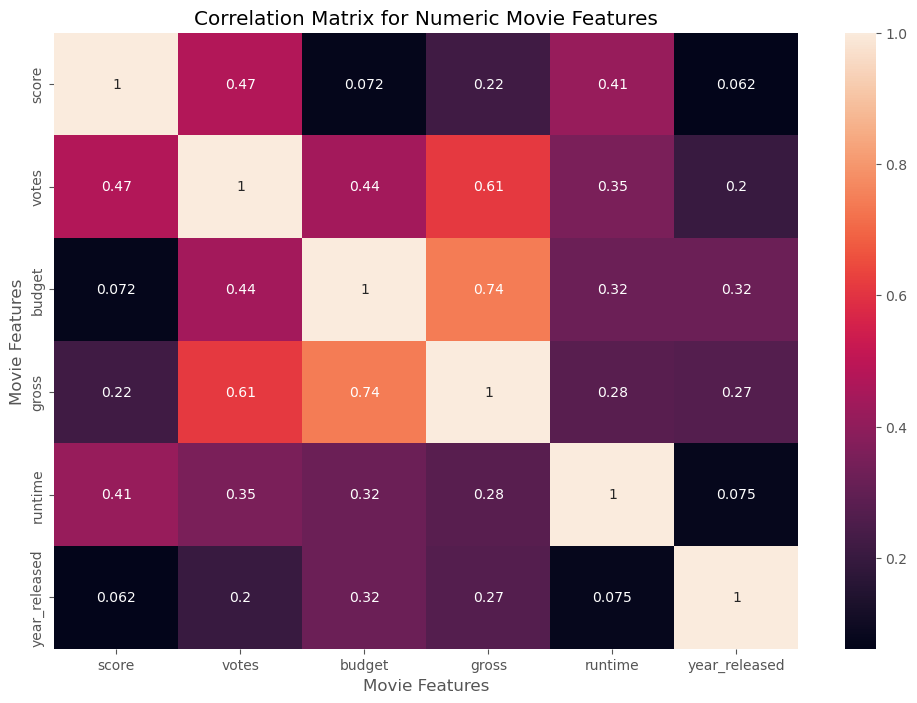

In [11]:
# Finding correlation within the data

correlation_matrix = movies.corr()

sns.heatmap(correlation_matrix, annot = True)

plt.title('Correlation Matrix for Numeric Movie Features')

plt.xlabel('Movie Features')

plt.ylabel('Movie Features')

plt.show()

# Votes and budget have the greatest correlation with gross

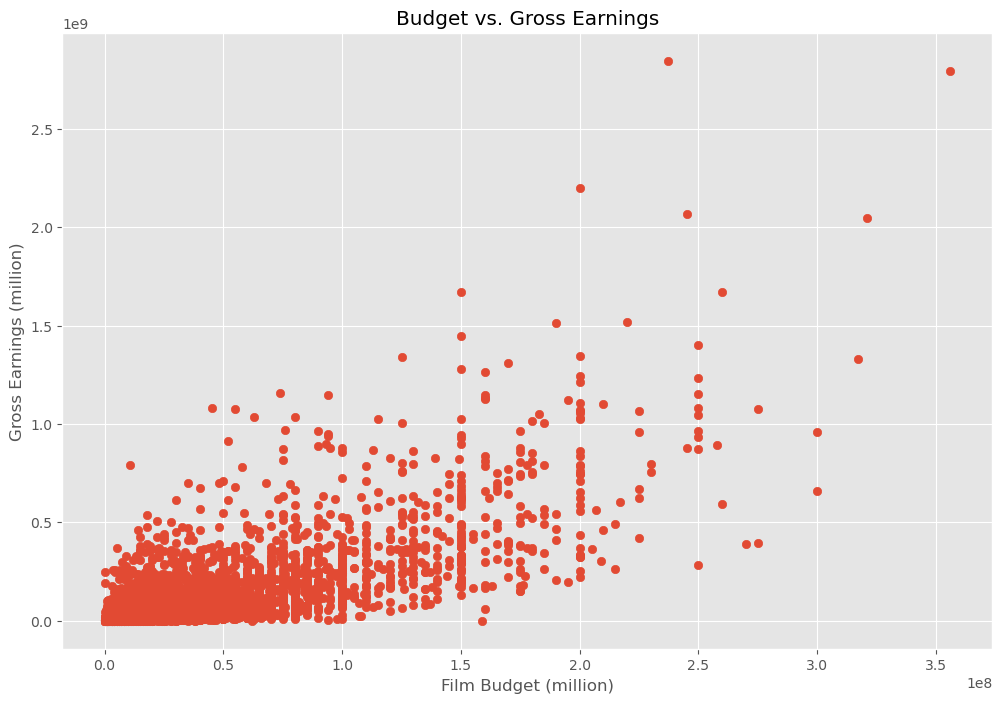

In [12]:
# Scatterplot of budget vs. gross

plt.scatter(x= movies['budget'], y= movies['gross'])

plt.title('Budget vs. Gross Earnings')

plt.xlabel('Film Budget (million)')

plt.ylabel('Gross Earnings (million)')

plt.show()

<AxesSubplot:xlabel='budget', ylabel='gross'>

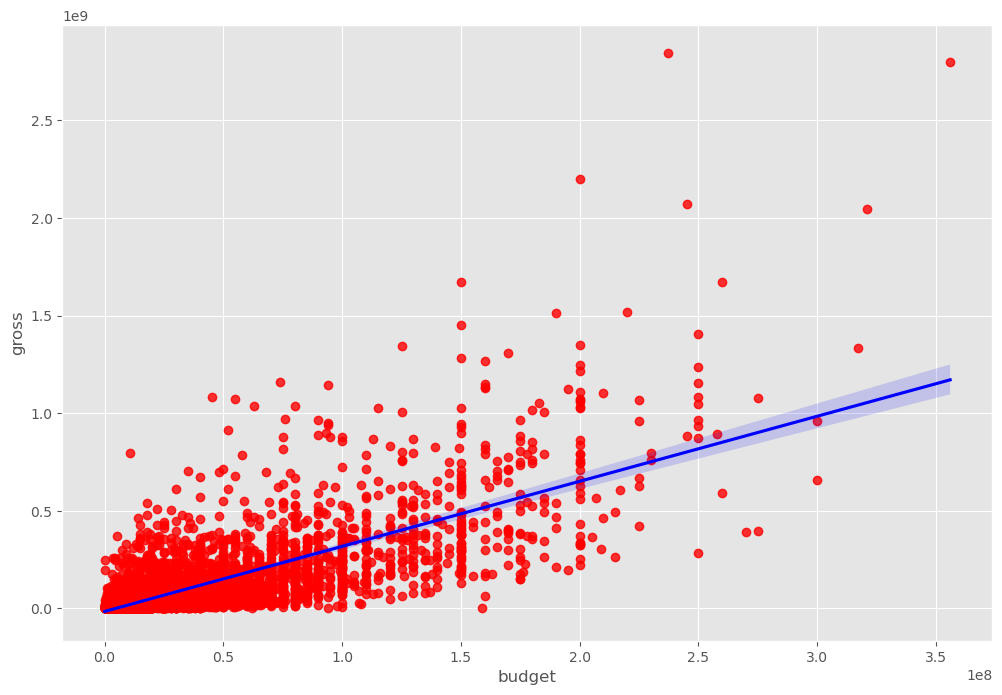

In [13]:
# Using seaborn to plot budget vs gross

sns.regplot(x = 'budget', y = 'gross', data = movies, scatter_kws = {"color" : 'red'}, line_kws = { "color" : 'blue'})

<AxesSubplot:xlabel='votes', ylabel='gross'>

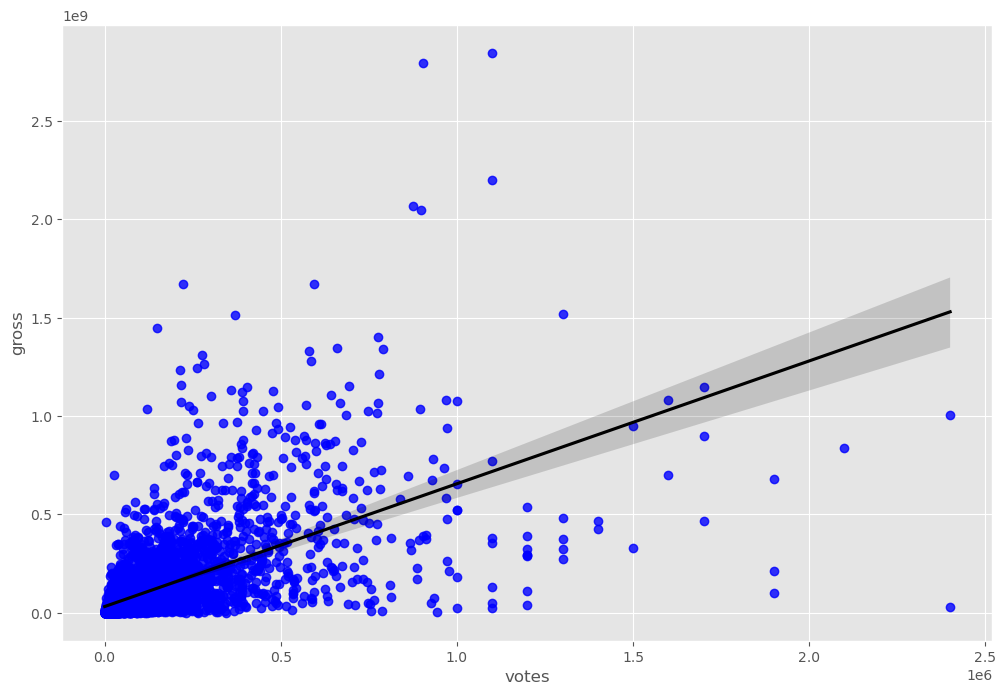

In [14]:
# Using seaborn to plot votes vs. gross

sns.regplot(x = 'votes', y = 'gross', data = movies, scatter_kws = {"color" : 'blue'}, line_kws = { "color" : 'black'})